# Identifying Complexes in your Network of Protein-Protein Interactions


**Contact: **

-   http://github.com/cokelaer
-   http://thomas-cokelaer.info

**Date:** Feb 2015

## Introduction

The assumption is that you have a network of protein-protein interactions, from which you know the protein names by their
uniprot accession number (e.g., P43403)

You can have for instance a network in various formats (e.g., SIF, SBSMLQual), in which case you may be interested to 
look at http://github.com/cellnopt/cellnopt . The SBMLqual format encodes network of proteins as logical gates (ORs and ANDs). One issue is how to you know thata logical gate is an AND. You can try all combinations and optimise the network to some data like in CellNOpt analysis. Another way is to use databases of complexes to identify such AND gates. 

Here below, we use the **Complexes** class that will take as input a list of UniProt identifiers and return possible logical AND gates. The database used being the scene is **Intact Complex. **

First we import the module of interest to be found in biokit.networt.complexes

In [1]:
import biokit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from biokit.network import complexes

We create an instance setting the cache to True. This is an option fro BioServices that create a
local file to speed up future requests. You can set it to False if you do not want to create local
cache files. The code will take about 30 seconds to run. If you use the cache, next time it will take half a second.


In [6]:
c = complexes.Complexes(cache=True)

Organism not set yet. 


By default the organism selected is *Homo sapiens*. Complexes for the Intact Complex database are not stored internally.
As an example, you can plot the histogram of number of participants (protein) within each complexes 

In [7]:
c.level

'WARNING'

In [4]:
count = c.hist_participants()

AttributeError: 'Complexes' object has no attribute 'logging'

Further analysis can be shown here below by focusing on the participants 
themselves: how many occurences, how many unique proteins.

In [ ]:
c.stats()

Some complexes are actually homodimers, which we may want to ignore

In [ ]:
_ = c.remove_homodimers()

There are 1234 complexes involving 4273 participants with 2800 unique species. 


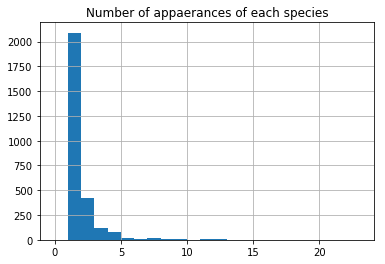

In [7]:
c.stats()

### Looking for complexes (AND gates)

We must provide a list if uniprot identifiers. Here is an example. The output of the **search** function is then
two fold:
    
   - dictionary containing the complexes for whic all participants are included in the user list of proteins
   - dictionary containing the complexes for which some participants are included in the user list of proteins (partial)

In [8]:
user_species = ['P51234', 'P11111', 'P22222', 'P33333', u'P51553', 
                 u'P50213', 'Q01955', 'P53420', u'P29400', 'Q8TD08', 'P47985', 'CHEBI:18420']
and_gates, subset = c.search_complexes(user_species, verbose=True)

INFO:root:Found partial complex EBI-11618185 with 1 participants out of 4
INFO:root:Found partial complex EBI-9301700 with 1 participants out of 5
INFO:root:Found partial complex EBI-11617933 with 1 participants out of 4
INFO:root:Found partial complex EBI-11618268 with 1 participants out of 4
INFO:root:Found partial complex EBI-1163785 with 1 participants out of 4
INFO:root:Found partial complex EBI-1224506 with 1 participants out of 12
INFO:root:Found entire complex EBI-2461456 
INFO:root:Found partial complex EBI-2461418 with 1 participants out of 2
INFO:root:Found partial complex EBI-1163476 with 1 participants out of 4
INFO:root:Found partial complex EBI-1163757 with 1 participants out of 4
INFO:root:Found partial complex EBI-9009096 with 1 participants out of 4
INFO:root:Found partial complex EBI-1210989 with 2 participants out of 4


In [9]:
and_gates

{'EBI-2461456': ['Q01955', 'P53420', 'P29400']}

In [10]:
subset

{'EBI-11617933': {'found': ['CHEBI:18420'],
  'participants': ['CHEBI:29034', 'P23921', 'Q7LG56', 'CHEBI:18420']},
 'EBI-11618185': {'found': ['CHEBI:18420'],
  'participants': ['CHEBI:29034', 'P11157', 'P07742', 'CHEBI:18420']},
 'EBI-11618268': {'found': ['CHEBI:18420'],
  'participants': ['CHEBI:29034', 'Q6PEE3', 'P07742', 'CHEBI:18420']},
 'EBI-1163476': {'found': ['CHEBI:18420'],
  'participants': ['P11177', 'P08559', 'CHEBI:18420', 'CHEBI:58937']},
 'EBI-1163757': {'found': ['CHEBI:18420'],
  'participants': ['P35486', 'Q9D051', 'CHEBI:18420', 'CHEBI:58937']},
 'EBI-1163785': {'found': ['CHEBI:18420'],
  'participants': ['P26284', 'P49432', 'CHEBI:18420', 'CHEBI:58937']},
 'EBI-1210989': {'found': ['P51553', 'P50213'],
  'participants': ['P51553', 'P50213', 'O43837', 'CHEBI:60240']},
 'EBI-1224506': {'found': ['P47985'],
  'participants': ['P22695',
   'P31930',
   'P07919',
   'P00156',
   'O14957',
   'Q9UDW1',
   'P08574',
   'CHEBI:30408',
   'O14949',
   'P14927',
   'P47985

For convenience, we wrap the **search_complexes** method as **report** method that returns a dataframe with all relevant
information

In [11]:
c.report(user_species)

,Found,Participants,Identifier,Name,Number found,Number of participants,Complete
0,Q01955;P53420;P29400,Q01955;P53420;P29400,EBI-2461456,Collagen type IV trimer variant 3,3,3,True
1,CHEBI:18420,CHEBI:29034;P23921;Q7LG56;CHEBI:18420,EBI-11617933,Ribonucleoside-diphosphate reductase RR1 compl...,1,4,False
2,P51553;P50213,P51553;P50213;O43837;CHEBI:60240,EBI-1210989,Mitochondrial isocitrate dehydrogenase complex...,2,4,False
3,CHEBI:18420,CHEBI:29034;P31350;P23921;CHEBI:18420,EBI-9009096,Ribonucleoside-diphosphate reductase RR1 compl...,1,4,False
4,CHEBI:18420,CHEBI:29034;P11157;P07742;CHEBI:18420,EBI-11618185,Ribonucleoside-diphosphate reductase RR1 compl...,1,4,False
5,CHEBI:18420,P11177;P08559;CHEBI:18420;CHEBI:58937,EBI-1163476,Pyruvate dehydrogenase E1 heterotetramer,1,4,False
6,CHEBI:18420,P35486;Q9D051;CHEBI:18420;CHEBI:58937,EBI-1163757,Pyruvate dehydrogenase E1 heterotetramer,1,4,False
7,P47985,P22695;P31930;P07919;P00156;O14957;Q9UDW1;P085...,EBI-1224506,Mitochondrial respiratory chain complex III,1,12,False
8,CHEBI:18420,CHEBI:29034;Q6PEE3;P07742;CHEBI:18420,EBI-11618268,Ribonucleoside-diphosphate reductase RR1 compl...,1,4,False
9,CHEBI:18420,CHEBI:16238;P25605;P07342;CHEBI:9532;CHEBI:18420,EBI-9301700,Acetolactate synthase complex,1,5,False


#### Other utilities

Instead of looking at a set of proteins, you can search for a given one 
to figure out if it is included in the database at all

In [12]:
# search for a given species
c.search('P51553')

INFO:root:Found P51553 in complex EBI-1210989 (['P51553', 'P50213', 'O43837', 'CHEBI:60240'])


['EBI-1210989']

Some participants are actually not protein but chemical compounds (e.g. magnesium), which are provided as ChEBI
identifiers. Again, we use here BioServices behind the scene and provide a small method to get the name of ChEBI identifier

In [13]:
c.chebi2name('CHEBI:18420')

magnesium(2+)

Similarly, protein are encoded as accession number, which can be translated in list of possible gene names mas follows

In [14]:
c.uniprot2genename('P16234')

['PDGFRA PDGFR2 RHEPDGFRA']

Finally, all details about a complex can be retrieved by looking at the dictionary **complexes**

In [15]:
c.complexes['EBI-1224506']['name']

'Mitochondrial respiratory chain complex III'

### Reproductibility

In [16]:
import easydev
for x in easydev.dependencies.get_dependencies('biokit'):
    print(x)

grequests 0.3.0
colorama 0.3.7
biokit 0.4.1
requests-cache 0.4.10
greenlet 0.4.12
numpydoc 0.6.0
suds-jurko 0.6
xmltodict 0.9.2
easydev 0.9.35
scipy 0.18.1
pandas 0.20.3
colormap 1.0.1
gevent 1.1rc4
appdirs 1.4.0
bioservices 1.4.18
six 1.10.0
numpy 1.10.4
wrapt 1.10.10
python-dateutil 2.6.0
colorlog 2.10.0
requests 2.10.0
pexpect 4.2.1
beautifulsoup4 4.5.3
pytz 2017.2
